In [1]:
# automatically reload dependant notebooks
%load_ext autoreload
%autoreload 2
import import_ipynb

# Tests of All-Pairs Shortest Path Algorithms

This notebook contains tests for the ASP algorithms implemented in the [`asp.ipynb`](./asp.ipynb) notebook.

## test Floyd-Warshall ASP

Let us test `aspFloydWarshall()` against the directed, weighted graph shown in Figure 23.1 p.652. So, we construct the graph, first.

importing Jupyter notebook from graph.ipynb
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
importing Jupyter notebook from util.ipynb
importing Jupyter notebook from asp.ipynb
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
importing Jupyter notebook from mst.ipynb
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
importing Jupyter notebook from ssp.ipynb
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
importing Jupyter notebook from ega.ipynb
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Floyd-Warshall
  1 None 
    [2,3,5]
  2 None 
    [4,5]
  3 None 
    [2]
  4 None 
    [1,3]
  5 None 
    [4]
  1-2: 3.0
  1-3: 8.0
  1-5: -4.0
  2-4: 1.0
  2-5: 7.0
  3-2: 4.0
  4-1: 2.0
  4-3: -5.0
  5-4: 6.0


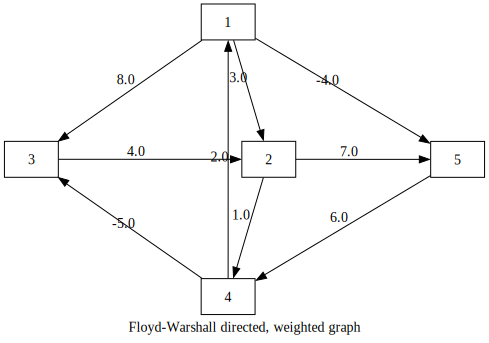

In [2]:
from graph import *
from asp import *

def makeFWAG() -> ASPGraph:
  vt = ["1", "2", "3", "4", "5"]
  et = [  # directed edges
    "1-2", "1-3", "1-5",
    "2-4", "2-5",
    "3-2",
    "4-1", "4-3",
    "5-4", ]
  ew = {
    "1-2": 3, "1-3": 8, "1-5": -4,
    "2-4": 1, "2-5": 7,
    "3-2": 4,
    "4-1": 2, "4-3": -5,
    "5-4": 6, }
  g = ASPGraph("Floyd-Warshall")
  g.makeVEw(vt, et, ew)
  return g

fwag = makeFWAG()
print(fwag)
draw(fwag, directed=True, label=f"{fwag.tag} directed, weighted graph")

Next, we apply `aspFloydWarshall()` to the graph to extract the ASP. `aspFloydWarshall()` returns an $n \times n$ weight matrix, where $n = |V|$. We simply print in tabular form.

In [3]:
fwagdd, fwagpp = aspFloydWarshall(fwag)
print(f"{fwag.tag}\n  all-pairs shortest paths")
for i in range(0, len(fwagdd)): print(f"    {fwagdd[i]}")
print("  predecessor subgraph")
for i in range(0, len(fwagpp)): print(f"    {list(map(lambda x: x + 1, fwagpp[i]))}")  # +1 to offset zero-based indices

Floyd-Warshall
  all-pairs shortest paths
    [0, 1, -3, 2, -4]
    [3, 0, -4, 1, -1]
    [7, 4, 0, 5, 3]
    [2, -1, -5, 0, -2]
    [8, 5, 1, 6, 0]
  predecessor subgraph
    [-9223372036854775806, 3, 4, 5, 1]
    [4, -9223372036854775806, 4, 2, 1]
    [4, 3, -9223372036854775806, 2, 1]
    [4, 3, 4, -9223372036854775806, 1]
    [4, 3, 4, 5, -9223372036854775806]


## test transitive closure

We next test the `tclosure()` algorithm against the directed, weighted graph shown in Figure 23.5 p.660. First, we construct the graph.

Transitive Closure
  1 None 
    []
  2 None 
    [3,4]
  3 None 
    [2]
  4 None 
    [1,3]
  2-3: 1.0
  2-4: 1.0
  3-2: 1.0
  4-1: 1.0
  4-3: 1.0


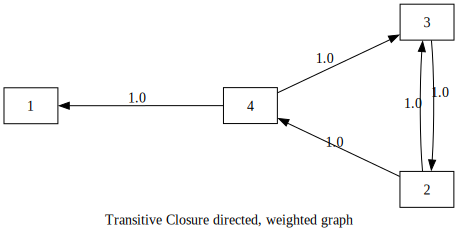

In [4]:
def makeTCG() -> ASPGraph:
  vt = ["1", "2", "3", "4"]
  et = [  # directed edges
    "2-3", "2-4",
    "3-2",
    "4-1", "4-3", ]
  ew = {  # dummy edge weights
    "2-3": 1, "2-4": 1,
    "3-2": 1,
    "4-1": 1, "4-3": 1, }
  g = ASPGraph("Transitive Closure")
  g.makeVEw(vt, et, ew)
  return g

tcg = makeTCG()
print(tcg)
draw(tcg, directed=True, label=f"{tcg.tag} directed, weighted graph")

Now, we apply `tclosure()` to the graph to obtain the $n \times n$ transitive closure matrix.

In [5]:
tcm = tclosure(tcg)
print(f"{tcg.tag}\n  transitive closure matrix")
for i in range(0, len(tcm)): print(f"    {tcm[i]}")

Transitive Closure
  transitive closure matrix
    [True, False, False, False]
    [True, True, True, True]
    [True, True, True, True]
    [True, True, True, True]


## test Johnson ASP

We shall test `aspJohnson()` using the directed, weighted graph shown in Figure 23.6 p.665. First, we construct the graph.

Johnson
  1 None  
    [2,3,5]
  2 None  
    [4,5]
  3 None  
    [2]
  4 None  
    [1,3]
  5 None  
    [4]
  1-2: 3.0
  1-3: 8.0
  1-5: -4.0
  2-4: 1.0
  2-5: 7.0
  3-2: 4.0
  4-1: 2.0
  4-3: -5.0
  5-4: 6.0


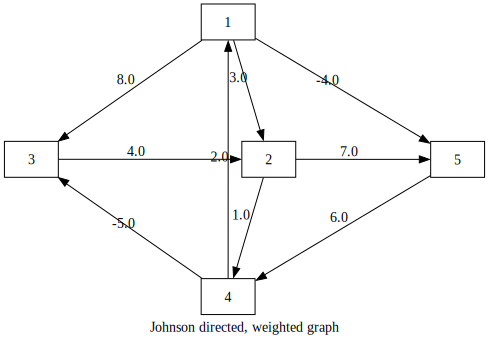

In [6]:
def makeJAG() -> JohnsonGraph:
  vt = ["1", "2", "3", "4", "5"]
  et = [  # directed edges
    "1-2", "1-3", "1-5",
    "2-4", "2-5",
    "3-2",
    "4-1", "4-3",
    "5-4", ]
  ew = {
    "1-2": 3, "1-3": 8, "1-5": -4,
    "2-4": 1, "2-5": 7,
    "3-2": 4,
    "4-1": 2, "4-3": -5,
    "5-4": 6, }
  g = JohnsonGraph("Johnson")
  g.makeVEw(vt, et, ew)
  return g

jag = makeJAG()
print(jag)
draw(jag, directed=True, label=f"{jag.tag} directed, weighted graph")

Next, we apply `aspJohnson()` to the graph to obtain the $n \times n$ matrix of shortest paths and a list of individual SSPs discovered by the application of Dijkstra's algorithm as each vertex as the source.

Each row of the matrix `jagdd` represents an SSP from the row vertex to each column vertex. For instance, `jagdd[0]` indicates the following shortest distances between vertices: `1-1` is 0.0, `1-5-4-3-2` is 2.0, `1-5-4-3` is 2.0, `1-5-4` is 2.0, and `1-5` is 0.0. This is so, because all edges on this SSP have 0.0 weights, except `5-4` which has `2.0`.

In [7]:
jagdd, jagtt = aspJohnson(jag)
print(f"{jag.tag}\n  all-pairs shortest paths")
for i in range(0, len(jagdd)): print(f"    {jagdd[i]}")

Johnsonω
  all-pairs shortest paths
    [0.0, 2.0, 2.0, 2.0, 0.0]
    [2.0, 0.0, 0.0, 0.0, 2.0]
    [2.0, 0.0, 0.0, 0.0, 2.0]
    [2.0, 0.0, 0.0, 0.0, 2.0]
    [4.0, 2.0, 2.0, 2.0, 0.0]


The rows correspond to the Figures 23.6 (c)-(g). See p.665. In the graphs below, the vertices show two numbers. The first is the vertex tag, and the second is the value in each column of the row.

The SSP in row `jagdd[0]` forms the following tree rooted at vertex `1`.

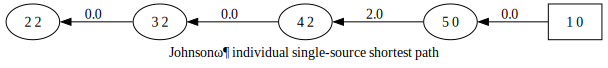

In [8]:
draw(jagtt[0], directed=True, label=f"{jagtt[0].tag} individual single-source shortest path")

The SSP in row `jagdd[1]` forms the following tree rooted at vertex `2`.

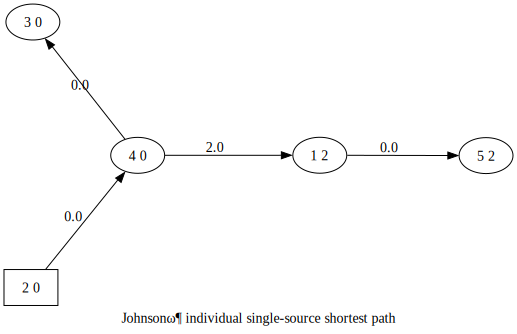

In [9]:
draw(jagtt[1], directed=True, label=f"{jagtt[0].tag} individual single-source shortest path")

The SSP in row `jagdd[2]` forms the following tree rooted at vertex `3`.

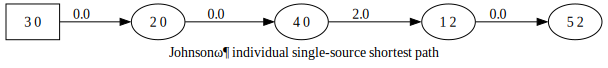

In [10]:
draw(jagtt[2], directed=True, label=f"{jagtt[0].tag} individual single-source shortest path")

The SSP in row `jagdd[3]` forms the following tree rooted at vertex `4`.

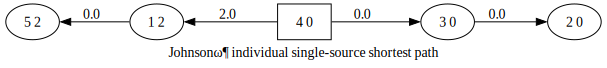

In [11]:
draw(jagtt[3], directed=True, label=f"{jagtt[0].tag} individual single-source shortest path")

The SSP in row `jagdd[4]` forms the following tree rooted at vertex `5`.

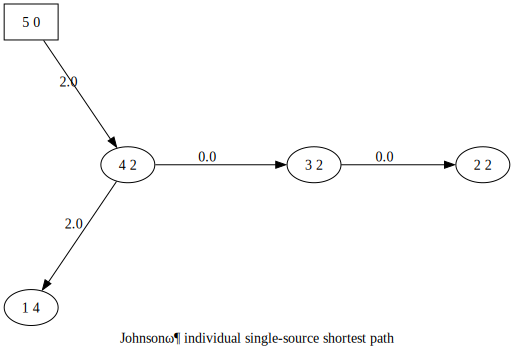

In [12]:
draw(jagtt[4], directed=True, label=f"{jagtt[0].tag} individual single-source shortest path")